## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
df.nunique()["Mouse ID"]

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df[df.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df.duplicated(["Mouse ID"])].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df.drop_duplicates("Mouse ID")
df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
df_clean["Mouse ID"].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
df_groupby_drug = df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = df_groupby_drug["Tumor Volume (mm3)"].mean()
median = df_groupby_drug["Tumor Volume (mm3)"].median()
var = df_groupby_drug["Tumor Volume (mm3)"].var()
std = df_groupby_drug["Tumor Volume (mm3)"].std()
sem = df_groupby_drug["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
df_summary_stats = pd.DataFrame({"Mean": mean,
                                 "Median": median,
                                 "Variance": var,
                                 "Standard Deviation": std,
                                 "SEM": sem})
df_summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df_groupby_drug["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

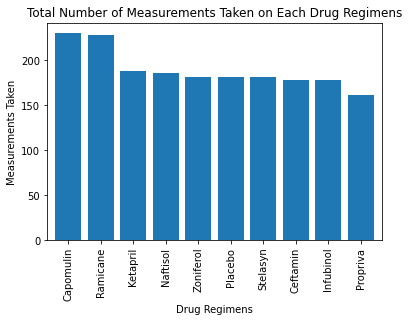

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# # Define axis
drug_regimen = df["Drug Regimen"].unique()
drug_measurement = df["Drug Regimen"].value_counts()

# # Graph
bar_chart = drug_measurement.plot.bar(width=0.8, title="Total Number of Measurements Taken on Each Drug Regimens")
bar_chart.set_xlabel("Drug Regimens")
bar_chart.set_ylabel("Measurements Taken");

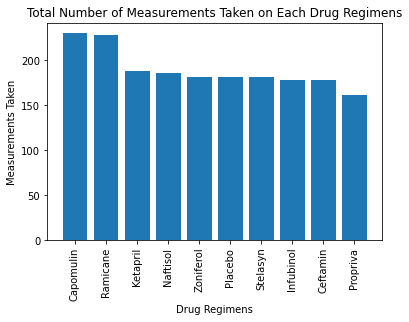

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"]

fig, ax = plt.subplots()
ax.bar(drug_regimen, drug_measurement);
ax.set(title="Total Number of Measurements Taken on Each Drug Regimens", 
       xlabel="Drug Regimens",
       ylabel="Measurements Taken");
plt.xticks(rotation=90);

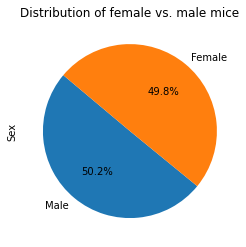

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# # Define axis
sex = df_clean["Sex"].unique()
sex_distribution = df_clean["Sex"].value_counts()

# # Graph
sex_distribution.plot.pie(title = "Distribution of female vs. male mice", 
                          autopct = "%1.1f%%", startangle=140);

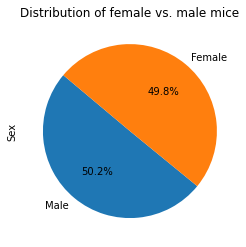

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig, ax = plt.subplots(figsize=(4,4))
ax.pie(sex_distribution, 
       labels=sex, 
       autopct="%1.1f%%", 
       startangle=140);
ax.set(title = "Distribution of female vs. male mice",
       ylabel = "Sex");

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_groupby_timepoint = df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_merged_tumor = pd.merge(df_groupby_timepoint, df, on=("Mouse ID", "Timepoint"))

df_merged_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for index, row in df_merged_tumor.iterrows():
    if row["Drug Regimen"] == treatment[0]:
        capomulin.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == treatment[1]:
        ramicane.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == treatment[2]:
        infubinol.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == treatment[3]:
        ceftamin.append(row["Tumor Volume (mm3)"])
        
    # add subset
df_top4 = pd.DataFrame({"Capomulin": capomulin,
                        "Ramicane": ramicane,
                        "Infubinol": infubinol,
                        "Ceftamin": ceftamin})

Capomulin
The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996
Values below 20.70456164999999 could be outliers."
Values above 51.83201549 could be outliers.



In [27]:
# Determine outliers using upper and lower bounds

quartiles = df_top4[treatment[0]].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'''{treatment[0]}
The lower quartile of temperatures is: {lowerq}
The upper quartile of temperatures is: {upperq}
The interquartile range of temperatures is: {iqr}
The the median of temperatures is: {quartiles[0.5]}''')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'''Values below {lower_bound} could be outliers."
Values above {upper_bound} could be outliers.
''')

quartiles = df_top4[treatment[1]].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'''{treatment[1]}
The lower quartile of temperatures is: {lowerq}
The upper quartile of temperatures is: {upperq}
The interquartile range of temperatures is: {iqr}
The the median of temperatures is: {quartiles[0.5]}''')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'''Values below {lower_bound} could be outliers."
Values above {upper_bound} could be outliers.
''')

quartiles = df_top4[treatment[2]].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'''{treatment[2]}
The lower quartile of temperatures is: {lowerq}
The upper quartile of temperatures is: {upperq}
The interquartile range of temperatures is: {iqr}
The the median of temperatures is: {quartiles[0.5]}''')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'''Values below {lower_bound} could be outliers."
Values above {upper_bound} could be outliers.
''')

quartiles = df_top4[treatment[3]].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'''{treatment[3]}
The lower quartile of temperatures is: {lowerq}
The upper quartile of temperatures is: {upperq}
The interquartile range of temperatures is: {iqr}
The the median of temperatures is: {quartiles[0.5]}''')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'''Values below {lower_bound} could be outliers."
Values above {upper_bound} could be outliers.
''')


Capomulin
The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996
Values below 20.70456164999999 could be outliers."
Values above 51.83201549 could be outliers.

Ramicane
The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229
Values below 17.912664470000003 could be outliers."
Values above 54.30681135 could be outliers.

Infubinol
The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046
Values below 36.83290494999999 could be outliers."
Values above 82.74144559000001 could be outliers.

Ceftamin
The lower quartile of tempe

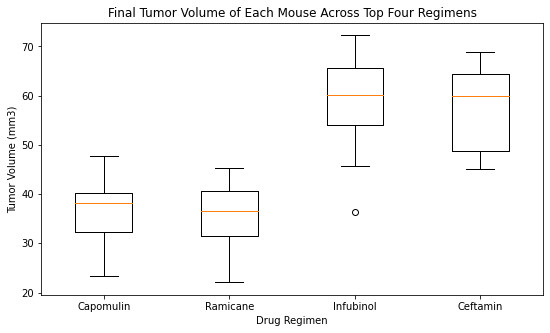

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_data = [df_top4[treatment[0]],
                df_top4[treatment[1]],
                df_top4[treatment[2]],
                df_top4[treatment[3]]]

fig, ax = plt.subplots(figsize=(9,5))
ax.boxplot(boxplot_data)
ax.set(title = "Final Tumor Volume of Each Mouse Across Top Four Regimens",
       xlabel = "Drug Regimen",
       ylabel = "Tumor Volume (mm3)");
plt.xticks([1,2,3,4], treatment);

## Line and Scatter Plots

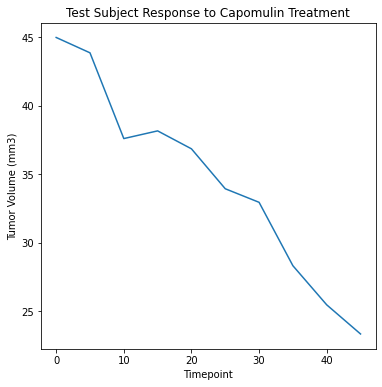

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_capomulin = df.loc[df["Drug Regimen"] == "Capomulin"]
mouse_id = "s185"
df_test_mouse = df_capomulin.loc[df["Mouse ID"] == mouse_id]

# # Define axis
tumor_volume = df_test_mouse["Tumor Volume (mm3)"]
time_point = df_test_mouse["Timepoint"]

# # Graph
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(time_point, tumor_volume);
ax.set(title = "Test Subject Response to Capomulin Treatment",
       xlabel = "Timepoint",
       ylabel = "Tumor Volume (mm3)");

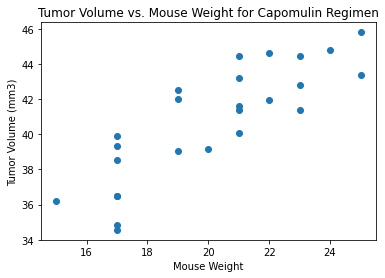

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_groupby_capomulin = df_capomulin.groupby("Mouse ID")

# # Define axis
avg_tumor = df_groupby_capomulin["Tumor Volume (mm3)"].mean()
avg_weight = df_groupby_capomulin["Weight (g)"].mean()

# # Graph
fig, ax = plt.subplots()
ax.scatter(avg_weight, avg_tumor);
ax.set(title="Tumor Volume vs. Mouse Weight for Capomulin Regimen",
       xlabel="Mouse Weight",
       ylabel="Tumor Volume (mm3)");

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor, avg_weight)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


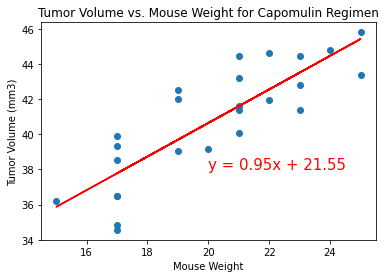

In [19]:
# # PLot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tumor)
regress_values = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots()
ax.scatter(avg_weight, avg_tumor);
ax.plot(avg_weight,regress_values,"r-")
ax.annotate(line_eq, (20,38), color="red", fontsize="15")
ax.set(title="Tumor Volume vs. Mouse Weight for Capomulin Regimen",
       xlabel="Mouse Weight",
       ylabel="Tumor Volume (mm3)");